In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### General Hypothesis
#### Store Level
1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

#### Product Level
1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.


In [2]:
import pandas as pd
import numpy as np

#Read files:
train = pd.read_csv("train_v9rqX0R.csv")
test = pd.read_csv("test_AbJTz2l.csv")

In [3]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [4]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Observations:
1. **Item_Visibility** has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
2. **Outlet_Establishment_Years** vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.
3. The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.


In [6]:
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

In [7]:
cat_cols = [col for col in data.columns if data[col].dtype == 'O']
cat_cols = [col for col in cat_cols if col not in ['Item_Identifier','Outlet_Identifier','source']]
for col in cat_cols:
    print(col)
    print(data[col].value_counts())

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


Observations:
1. Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.
2. Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.
3. Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.


In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [9]:
avg_weight = pd.DataFrame(data.groupby('Item_Identifier')['Item_Weight'].mean())

In [10]:
avg_weight.loc['FDP10']

Item_Weight    19.0
Name: FDP10, dtype: float64

In [11]:
miss_bool = data['Item_Weight'].isnull()
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: avg_weight.loc[x])

In [12]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [13]:
from scipy.stats import mode

outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [14]:
miss_bool = data['Outlet_Size'].isnull() 
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [15]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [16]:
# Considering Combining Outlet_Type
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')
# There is a significance difference for each type, hence we should'nt consider combining.

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [17]:
# Let's consider replacing the null value(0) of the visibility with the mean
visibility_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')
visibility_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [18]:
miss_bool = (data['Item_Visibility'] == 0)
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])

In [19]:
train['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [20]:
data['Item_Visibility']

0        0.016047
1        0.019278
2        0.016760
3        0.017834
4        0.009780
           ...   
14199    0.013496
14200    0.142991
14201    0.073529
14202    0.088380
14203    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [21]:
# Creating a new feature that is the ratio of the ItemVisibility with the Average of all other stores
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)
print(data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [22]:
def val(x):
    if x=='Seafood':
        return 'Meat'
    else: return x
# data['Item_Type'].value_counts()
data['New_Item_Type'] = data['Item_Type'].apply(val)
data['New_Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      825
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Name: New_Item_Type, dtype: int64

In [23]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [24]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

In [25]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [26]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

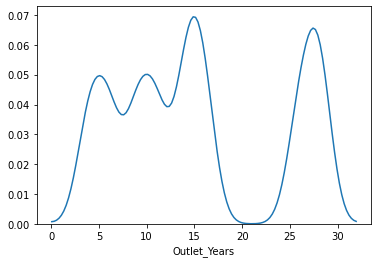

In [27]:
sns.distplot(data['Outlet_Years'],hist=False,kde=True)

In [28]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [29]:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"

In [30]:
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [31]:
data.nunique()

Item_Identifier               1559
Item_Weight                    628
Item_Fat_Content                 3
Item_Visibility              13688
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
Item_Visibility_MeanRatio    13304
New_Item_Type                   15
Item_Type_Combined               3
Outlet_Years                     9
dtype: int64

In [32]:
data.drop(['New_Item_Type'],axis=1,inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [34]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'],drop_first=True)

In [35]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_1                       uint8
Outlet_2                       uint8
Outlet_3                       uint8
Outlet_4                       uint8
Outlet_5                       uint8
O

In [36]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [37]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [38]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\Anant\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Model Making

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. SVR
5. Random Forest
6. XGB

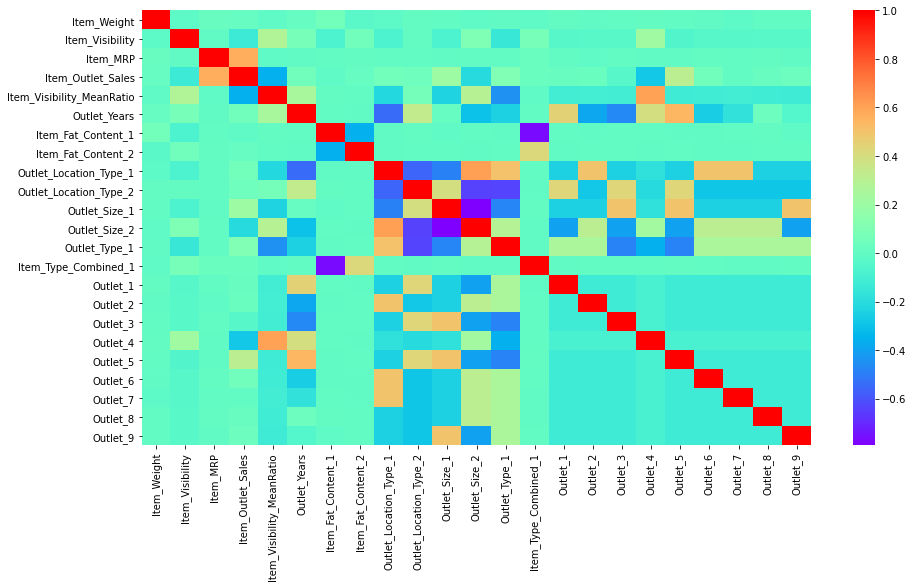

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(train.drop(['Outlet_Type_3','Outlet_Type_2','Item_Type_Combined_2'],axis=1).corr(),cmap='rainbow')

In [40]:
# train.drop(['Outlet_Type_3','Outlet_Type_2','Item_Type_Combined_2'],axis=1,inplace=True)

In [41]:
# test.drop(['Outlet_Type_3','Outlet_Type_2','Item_Type_Combined_2'],axis=1,inplace=True)

In [57]:
# train.shape[1]
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Identifier             object
Item_Outlet_Sales            float64
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_1                       uint8
Outlet_2                       uint8
Outlet_3                       uint8
Outlet_4                       uint8
Outlet_5                       uint8
Outlet_6                       uint8
Outlet_7                       uint8
Outlet_8                       uint8
O

In [68]:
from sklearn.decomposition import PCA
explained_var = []
for i in range(1,26):
    pca = PCA(i)
    train_2 = pca.fit_transform(train.drop(['Item_Identifier','Outlet_Identifier'],axis=1).values)
    explained_var.append(pca.explained_variance_ratio_)
explained_var

[array([0.99906651]),
 array([9.99066513e-01, 9.01160967e-04]),
 array([9.99066513e-01, 9.01160967e-04, 2.40343500e-05]),
 array([9.99066513e-01, 9.01160967e-04, 2.40343500e-05, 7.39521215e-06]),
 array([9.99066513e-01, 9.01160967e-04, 2.40343500e-05, 7.39521215e-06,
        2.75817782e-07]),
 array([9.99066513e-01, 9.01160967e-04, 2.40343500e-05, 7.39521215e-06,
        2.75817782e-07, 1.74676555e-07]),
 array([9.99066513e-01, 9.01160967e-04, 2.40343500e-05, 7.39521215e-06,
        2.75817782e-07, 1.74676555e-07, 9.43327562e-08]),
 array([9.99066513e-01, 9.01160967e-04, 2.40343500e-05, 7.39521215e-06,
        2.75817782e-07, 1.74676555e-07, 9.43327562e-08, 7.56964247e-08]),
 array([9.99066513e-01, 9.01160967e-04, 2.40343500e-05, 7.39521215e-06,
        2.75817782e-07, 1.74676555e-07, 9.43327562e-08, 7.56964247e-08,
        6.27941852e-08]),
 array([9.99066513e-01, 9.01160967e-04, 2.40343500e-05, 7.39521215e-06,
        2.75817782e-07, 1.74676555e-07, 9.43327562e-08, 7.56964247e-08,
  

In [85]:
from sklearn.feature_selection import SelectKBest,f_regression
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
X_train,y_train = train.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1),train['Item_Outlet_Sales']
X_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

In [86]:
freg = pd.DataFrame(fs.scores_,index=X_train.columns).sort_values(by=0,ascending=False)

In [87]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression
fs = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
X_train,y_train = train.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1),train['Item_Outlet_Sales']
X_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

In [88]:
mreg = pd.DataFrame(fs.scores_,index=X_train.columns).sort_values(by=0,ascending=False)

In [89]:
freg

,0
Item_MRP,4049.456229
Item_Visibility_MeanRatio,1242.809720
Outlet_5,913.656782
Outlet_Type_3,913.656782
Outlet_4,709.526853
Outlet_Size_2,388.862700
Outlet_Size_1,372.668085
Item_Visibility,142.957241
Outlet_Type_1,102.009171
Outlet_Location_Type_1,29.022072


In [90]:
mreg

,0
Item_MRP,0.763463
Item_Visibility_MeanRatio,0.241580
Outlet_Years,0.156806
Outlet_4,0.096252
Outlet_Type_1,0.094094
Item_Visibility,0.081645
Outlet_Type_3,0.052713
Outlet_5,0.051328
Outlet_Size_1,0.039269
Outlet_Size_2,0.037576


In [91]:
from sklearn.feature_selection import SelectKBest,f_regression
fs = SelectKBest(score_func=f_regression, k=15)
# learn relationship from training data
X_train,y_train = train.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1),train['Item_Outlet_Sales']
X_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

In [98]:
X_train_fs[18]

array([3.42376820e-02, 1.13283400e+02, 8.70492869e-01, 2.80000000e+01,
       0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00])

In [100]:
y_train[18]

2303.6679999999997

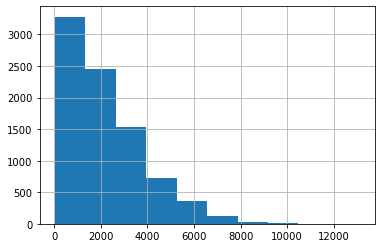

In [103]:
y_train.hist()

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X_train_fs,y_train,random_state=42)

In [105]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

0.15167963218924585

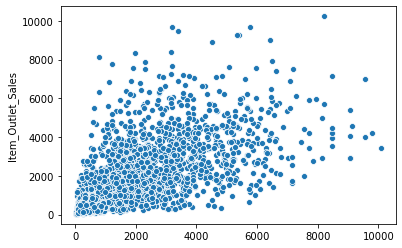

In [107]:
pred = dt.predict(X_valid)
sns.scatterplot(pred,y_valid)
dt.score(X_valid,y_valid)

In [108]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

0.5535009547830847

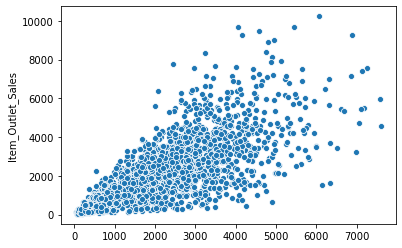

In [109]:
pred = rf.predict(X_valid)
sns.scatterplot(pred,y_valid)
rf.score(X_valid,y_valid)

In [110]:
import xgboost as xgb
xgbreg = xgb.XGBRegressor()
xgbreg.fit(X_train,y_train)

[23:35:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

0.5952262941977752

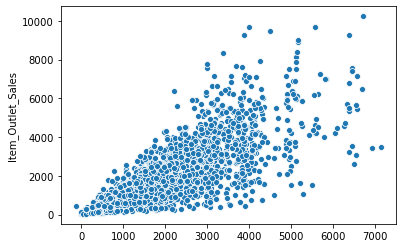

In [111]:
pred = xgbreg.predict(X_valid)
sns.scatterplot(pred,y_valid)
xgbreg.score(X_valid,y_valid)

In [112]:
xgb.XGBRegressor()

XGBRegressor()

In [114]:
grid = {
    'max_depth' : [2,3,4,5,10,15,30,50,100],
    'learning_rate' : np.linspace(0,1,50),
    'n_estimators' : [100,200,300,400,500,600,700,800,900,1000,1100,1200],
    'min_child_weight' : [1,2,4,8,10],
}

In [116]:
# from sklearn.model_selection import RandomizedSearchCV
# xgb_random = RandomizedSearchCV(xgbreg,grid,random_state=42,n_jobs=-1,verbose=3)
# xgb_random.fit(X_train,y_train)

In [118]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression
fs = SelectKBest(score_func=mutual_info_regression, k=15)
# learn relationship from training data
X_train,y_train = train.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1),train['Item_Outlet_Sales']
X_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

In [119]:
import xgboost as xgb
xgbreg = xgb.XGBRegressor()
xgbreg.fit(X_train_fs,y_train)

[00:00:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [132]:
pred = np.abs(xgbreg.predict(X_test_fs))

In [133]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Item_Outlet_Sales', 'Item_Visibility_MeanRatio',
       'Outlet_Years', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9'],
      dtype='object')

In [134]:
test['Item_Outlet_Sales'] = pred

C:\Users\Anant\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Item_Visibility_MeanRatio', 'Outlet_Years',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_1', 'Outlet_Size_2',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9', 'Item_Outlet_Sales'],
      dtype='object')

In [136]:
final = test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [139]:
final.to_csv('submission.csv',index=False)

In [138]:
final

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,1377.420898
8524,FDW14,OUT017,1415.240234
8525,NCN55,OUT010,623.800354
8526,FDQ58,OUT017,2615.830811
8527,FDY38,OUT027,6087.415039
...,...,...,...
14199,FDB58,OUT046,2198.638916
14200,FDD47,OUT018,2271.928955
14201,NCO17,OUT045,1847.249756
14202,FDJ26,OUT017,3628.119385
